In [1]:
import sys
sys.path.append("./MDPP")
import argparse
from config.config import Config
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pickle as pkl
import os
from datetime import datetime
import math
early = 0
dataset = "misinfdect"
cnf = Config(dataset=dataset, version="", early=early)
print(datetime.now())

2022-06-06 21:50:44.324818


In [2]:
from utils.util import read_origin, read_retweets, time_interval

datafolder = "./MDPP/data/misinfdect"
origin = read_origin(cnf.originfolder)
fake = read_retweets(cnf.fakefolder)
nonfake = read_retweets(cnf.nonfakefolder)


def process_samples(Retweet, origin):
    degrees = []
    for mid, retweets in Retweet:
        if mid not in origin:
            continue
        mids = [mid]
        rel = {}
        for retweet in retweets:
            r_id = retweet["mid"]
            mids.append(r_id)
            p_id = retweet["parent"]
            if p_id not in rel:
                rel[p_id] = [r_id]
            else:
                rel[p_id].append(r_id)
        max_val = 0
        for val in rel.values():
            max_val = max(len(val), max_val)
        degrees.append(max_val)

    return degrees

fake_degrees = process_samples(fake, origin)
nonfake_degrees = process_samples(nonfake, origin)
f_max= np.max(fake_degrees)
nf_max= np.max(nonfake_degrees)
print(f_max, nf_max)

38 122


In [2]:
def read_pkl(file):
    with open(file, "rb") as f:
        data = pkl.load(f)
    return data
repr_folder = f"./MDPP/output/reprs/{dataset}"
fake_file = os.path.join(repr_folder, f"f_degree_entropy_time.pkl")
nonfake_file = os.path.join(repr_folder, f"nf_degree_entropy_time.pkl")
f_entropy = read_pkl(fake_file)
nf_entropy = read_pkl(nonfake_file)

In [3]:
f_mids = [mid for mid in f_entropy]
nf_mids = [mid for mid in nf_entropy]
mids = f_mids + nf_mids
print(len(mids))

11765


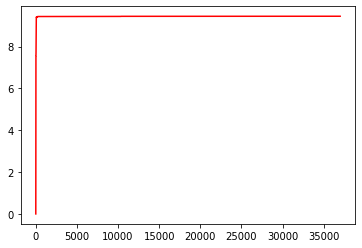

In [27]:
# mid = "AB8TGq5nn"
# # Y = f_entropy["zyBxAfVCi"]
# Y = f_entropy[mid]
# X = [i for i in range(0, len(Y))]
# plt.plot(X, Y, color="red")
# plt.show()

In [4]:
from collections import Counter
import numpy as np
import random
from datetime import datetime
import pandas as pd
# u1=2
# alpha=1
# u2=0.3
# beta=1
# down = np.exp(-u1)*alpha
# up = np.exp(-u2)*beta
# print(down, up)
def draw_stages(mid, X, Y, tags, label):
    if label == 0:
        name = "fake"
        color = "red"
    else:
        name = "nonfake"
        color = "blue"
    X_tag = []
    Y_tag = []
    for items in tags:
        X_tag.append(items[0])
        Y_tag.append(items[1])
    plt.clf()

    plt.plot(X, Y, color=color)
    plt.scatter(X_tag, Y_tag, color="black", s=10)
    plt.xlabel("Time")
    plt.ylabel("Entropy")
    # plt.show()
    plt.savefig(f"{dataset}_stages_{mid}_{name}.pdf")

In [5]:

l = []
def plot_fig(mid,X,Y,label):
    # Y = Y[:96]
    # X = X[:96]
    # ups = [0.1 * i for i in range(1,100)]
    up = 0.08
    tags = []
    # print(mid, Y)
    # print("Y:", len(Y))
    for item in range(1, len(Y)-1):
        if early != 0 and (item+1)*15 > early * 60:
            break
        d_k1 = Y[item]-Y[item-1]
        d_k2 = Y[item+1]-Y[item]
        d = np.abs(d_k1-d_k2)/(1+d_k1*d_k2)
        if d > up:
            tags.append((item,Y[item]))
    if len(tags) == 0:
        print(mid, len(Y))
    l.append(len(Y))

    # draw_stages(mid, X,Y,tags, label)

    return tags

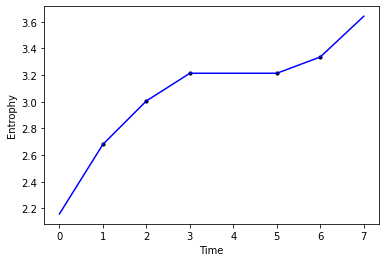

In [18]:
f_selected_mids = ["AARuF0nyt","CvW2gf8M3","GdBHGhPvw"]
nf_selected_mids = ["HoFiR7HmY","yxAQ1vStp","zoV7Ze2Vr"]
for mid in f_selected_mids:
    Y = f_entropy[mid]
    if len(Y) > 96:
        Y = Y[:96]
    X = [i for i in range(0, len(Y))]
    plot_fig(mid, X, Y,0)

for mid in nf_selected_mids:
    Y = nf_entropy[mid]
    if len(Y) > 96:
        Y = Y[:96]
    X = [i for i in range(0, len(Y))]
    plot_fig(mid, X, Y,1)

AA4hbfNXn 2
DBiBmzsmU 2
BgD0t7Skc 2
F7sTVv5ek 2
E3Jkbpq3P 2
zA4lx40CA 2
zyCDm9Tji 2
Bpo9jvGvJ 2
CvxZV1szu 2
AA42ic6ow 1
zx7Qnwc8S 1
GzBRixD6b 2
F5v4Xvm4S 3874
zE5K38Gnr 1
zmCsX3DzU 2
AmxUyzgTM 2
C3Eys4L5r 274
E2ym8yXP4 2
zsnItnVHJ 2
ztB5FhLau 2
BbH764Sro 745
zt2UkubJr 1
Hn8GH9KW6 2
HoFzzEkkz 2248
Cqm3EnL54 2
CwLPG7scp 27
HmDarB9Sy 1
Hr6tDpayg 1578
Ge3ik4WeE 1
GcPEUvpa9 1
F6HqZkaSi 2
HokZEkfVm 33
GcPiD5cYz 1
Hr7SzbjzX 618
GzC9ObUsF 2
Hr6pAfDtv 893
FaQ9tCJdn 1
HfyAzowC2 5
HqadsfrQ3 2
yiRnkxZGj 9
AgPgKwY7U 189172
HqQgP76mD 142
HqeYmE4s5 922
HqUnXqJY8 2
HqbUElKLQ 1
yqByU2uuS 3
Gff7IfbkT 1
znrMA3SVC 52297
F7YfomCOO 2
xCgV5dUpP 1171
EAOHusp2x 1
Bk3HRBGUw 1193
zir7zn6gS 2
yqHSuxaEw 1
zfahhqFmj 1
HmpRM2PEr 6
Hm8YEmtIp 2681
Hr661wUfu 570
GcPoh0rir 2
GcyFLjYYM 15545
Ho3tD9bgJ 1834
GcyFzyFp3 15982
Counter({7: 883, 5: 789, 9: 759, 8: 747, 6: 745, 4: 695, 11: 658, 3: 647, 10: 622, 13: 567, 12: 550, 14: 516, 18: 496, 16: 459, 15: 452, 2: 442, 17: 334, 1: 241, 19: 211, 20: 205, 21: 137, 22: 132, 23: 

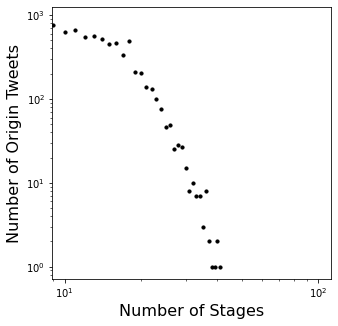

In [7]:
from collections import Counter
def Draw_loglog(X, Y, labels, name):
    X = np.array(X)
    Y = np.array(Y)

    fontsize = 16

    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.scatter(X, Y,s=10, c='black')
    # ax.set_xticks(fontsize=fontsize)
    # ax.set_yticks(fontsize=fontsize)
    ax.set_xlabel(labels[0], fontsize=fontsize)
    ax.set_ylabel(labels[1], fontsize=fontsize)
    fig.savefig(f"{dataset}-{name}.pdf")

l_Tags = []
for mid in mids:
    label = -1
    if mid in f_entropy:
        Y = f_entropy[mid]
        label = 0
    elif mid in nf_entropy:
        Y = nf_entropy[mid]
        label = 1
    else:
        continue
    # if len(Y) > 96:
    #     Y = Y[:96]
    X = [i for i in range(0, len(Y))]
    tags = plot_fig(mid, X, Y,label)
    l_Tags.append(len(tags))
# print(l_Tags[:10])
res = Counter(l_Tags)
X = []
Y = []
for k, v in res.items():
    X.append(k)
    Y.append(v)
Draw_loglog(X,Y,["Number of Stages","Number of Origin Tweets"],"Stages")
print(res)

In [ ]:
Tags = {}
fYs = []
nfYs = []
label_f = 0
label_nf = 0
random.shuffle(mids)
cnt = 0
for mid in mids:
    label = -1
    if mid in f_entropy:
        Y = f_entropy[mid]
        label = 0
    elif mid in nf_entropy:
        Y = nf_entropy[mid]
        label = 1
    else:
        continue
    if len(Y) > 96:
        Y = Y[:96]
    X = [i for i in range(0, len(Y))]
    plot_fig(mid, X, Y,label)
    cnt += 1
    if cnt>=10:
        break

In [ ]:
Tags = {}
fYs = []
nfYs = []
label_f = 0
label_nf = 0
random.shuffle(mids)
selected_mids = []
for mid in mids:
    label = -1
    if mid in f_entropy:
        Y = f_entropy[mid]
        label = 0
        selected_mids.append(mid)
    elif mid in nf_entropy:
        Y = nf_entropy[mid]
        label = 1
        selected_mids.append(mid)
    else:
        continue
    if len(Y) > 96 :
        if label_f < 5 and label == 0:
            fYs.append(np.array(Y[:96]))
            label_f += 1
        if label_nf < 5 and label == 1:
            nfYs.append(np.array(Y[:96]))
            label_nf += 1
    X = [i for i in range(0, len(Y))]
    # tags = plot_fig(mid,X,Y)
    # Tags[mid] = tags

    if label_f >= 5 and label_nf >= 5:
        break
    # if len(Tags) > 5:
    #     break
fYs = np.array(fYs)
nfYs = np.array(nfYs)
# print(Ys.shape)
fYs = np.mean(fYs,axis=0)
nfYs = np.mean(nfYs,axis=0)
# print(Ys.shape)
X = [i for i in range(0, len(fYs))]
plt.plot(X, fYs, color="red")
plt.plot(X, nfYs, color="blue")
plt.xlabel("Time")
plt.ylabel("Entropy")
currentDateAndTime = datetime.now()
currentTime = currentDateAndTime.strftime("%Y-%m-%d %H:%M:%S")
plt.savefig(f"./entropy_figs/{dataset}-entropy-{currentTime}.pdf")
selected_mids = ",".join(selected_mids)
res = {}
res["time"] = currentTime
res["selected_mids"] = selected_mids
df = pd.DataFrame(res, index=[0])
res_file = f"./entropy_figs/selected_mids.csv"
if os.path.exists(cnf.result_file):
    df.to_csv(res_file, mode='a', header=False, index=False)
else:
    df.to_csv(res_file, mode='a', header=True, index=False)

In [91]:
# if early==0:
#     tagfile = os.path.join(cnf.datafolder,"tags.pkl")
# else:
#     tagfile = os.path.join(cnf.datafolder,f"tags_{str(early)}.pkl")
tagfile = cnf.tagsfile
with open(tagfile, "wb") as f:
    pkl.dump(Tags,f)


In [30]:
# 各样本分了多少阶段
cnt = 0
stages = []
for k,v in Tags.items():
    stages.append(len(v))
res = Counter(stages)
tmp = []
for k,v in res.items():
    tmp.append((k,v))
tmp = sorted(tmp, key=lambda x:x[0])
for item in tmp:
    print(item)

(0, 990)
(1, 634)
(2, 474)
(3, 595)
(4, 434)
(5, 421)
(6, 359)
(7, 299)
(8, 222)
(9, 205)
(10, 175)
(11, 141)
(12, 131)
(13, 96)
(14, 92)
(15, 70)
(16, 64)
(17, 39)
(18, 36)
(19, 43)
(20, 30)
(21, 30)
(22, 27)
(23, 14)
(24, 20)
(25, 13)
(26, 12)
(27, 9)
(28, 10)
(29, 9)
(30, 7)
(31, 11)
(32, 4)
(33, 2)
(34, 3)
(35, 3)
(36, 4)
(37, 4)
(39, 2)
(41, 1)
(43, 1)
(45, 2)
(51, 1)
(53, 1)
(60, 1)


In [20]:
from utils.util import read_origin, read_retweets, time_interval

datafolder = f"./data/{dataset}"
origin = read_origin(cnf.originfolder)
fake = read_retweets(cnf.fakefolder)
nonfake = read_retweets(cnf.nonfakefolder)
selected_mids = "EdHkayXRF,AcdpNkaSh,AxVzS7Hku,A3V2lksJm,DvNXGbng7,F916W16mf,DzVjG2pXl,G8JWo3UMX,znjFtDdL5,HdJd4d1sH,zBRxTwDkU"
selected_mids = selected_mids.split(",")
def get_Relation(Retweets):
    Relation = {}
    leaf_num = []
    for mid, retweets in Retweets:
        children = {}
        if len(retweets) == 0:
            continue
        for retweet in retweets:
            if retweet["parent"] == "":
                parent_id = mid
            else:
                parent_id = retweet["parent"]
            if parent_id in children:
                children[parent_id].append(retweet["mid"])
            else:
                children[parent_id] = [retweet["mid"]]
        Relation[mid] = children
        leaf_num.append(len(retweets) + 1 - len(children))
    return Relation, leaf_num
fake_Relation,_ = get_Relation(fake)
nonfake_Relation,_ = get_Relation(nonfake)
for mid in selected_mids:
    if mid in fake_Relation:
        relation = fake_Relation[mid]
        print("fake",mid)
    else:
        relation = nonfake_Relation[mid]
        print("nonfake",mid)
    infos = {}
    infos["parent"] = []
    infos["child"] = []
    for p,c in relation.items():
        for item in c:
            infos["parent"].append(p)
            infos["child"].append(item)

    df = pd.DataFrame(infos)
    info_file = f"./entropy_figs/node_pairs_{mid}.csv"
    if os.path.exists(cnf.result_file):
        df.to_csv(info_file, mode='a', header=False, index=None)
    else:
        df.to_csv(info_file, mode='a', header=True, index=None)


fake EdHkayXRF
fake AcdpNkaSh
nonfake AxVzS7Hku
fake A3V2lksJm
nonfake DvNXGbng7
nonfake F916W16mf
fake DzVjG2pXl
nonfake G8JWo3UMX
fake znjFtDdL5
nonfake HdJd4d1sH
nonfake zBRxTwDkU
